## Logistic Regression (Phishing Dataset)

In [1]:
#Load the phishing website dataset (this dataset has 11000+ data samples). Each sample has 30 website
#parameters and then a class label identifying it as a phishing website or not (1 or -1).

#The task is to train a Logistic Regression classifier which can detect phishing websites.

#Use 70% data for training and 30% for testing.

#Train the model using training data and then use it to predict the test data.

#Then print the count of misclassified samples in the test data prediction as well as the accuracy score of this prediction.

#Then train with only two input parameters. e.g. parameter index 5 (parameter Prefix_Suffix) and 13 (URL_of_Anchor) only out of
#30 parameters. Check accuracy on the test data again and compare the accuracy with the previous value, where it was
#trained on all the parameters.

#Plot the test samples along with the decision boundary when trained with index 5 and index 13 parameters.

### Import modules

In [2]:
#Import relevant libraries
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

### Define Input and Output

In [3]:
#Import relevant file
phishing = np.loadtxt('W:/Ckalib.Nelson/HackCville/Final Project/phishing.txt', delimiter=',')

#30 website parameters
#Most parameters, such as Prefix_Suffix, are either phishing or legitimate

#attribute having_IP_Address  { -1,1 }
#attribute URL_Length   { 1,0,-1 }
#attribute Shortining_Service { 1,-1 }
#attribute having_At_Symbol   { 1,-1 }
#attribute double_slash_redirecting { -1,1 }
#attribute Prefix_Suffix  { -1,1 } - 
#attribute having_Sub_Domain  { -1,0,1 }
#attribute SSLfinal_State  { -1,1,0 }
#attribute Domain_registeration_length { -1,1 }
#attribute Favicon { 1,-1 }
#attribute port { 1,-1 }
#attribute HTTPS_token { -1,1 }
#attribute Request_URL  { 1,-1 }
#attribute URL_of_Anchor { -1,0,1 }
#attribute Links_in_tags { 1,-1,0 }
#attribute SFH  { -1,1,0 }
#attribute Submitting_to_email { -1,1 }
#attribute Abnormal_URL { -1,1 }
#attribute Redirect  { 0,1 }
#attribute on_mouseover  { 1,-1 }
#attribute RightClick  { 1,-1 }
#attribute popUpWidnow  { 1,-1 }
#attribute Iframe { 1,-1 }
#attribute age_of_domain  { -1,1 }
#attribute DNSRecord   { -1,1 }
#attribute web_traffic  { -1,0,1 }
#attribute Page_Rank { -1,1 }
#attribute Google_Index { 1,-1 }
#attribute Links_pointing_to_page { 1,0,-1 }
#attribute Statistical_report { -1,1 }
#attribute Result  { -1,1 }

### Create X and Y data

In [4]:
X = phishing[:, 0:30]
y = phishing[:,30:31]
print('Class labels:', np.unique(y))
#Phishing website or not


# Splitting data into 70% training and 30% test data:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=1, stratify=y)
y_train = np.array(y_train.ravel())
y_test = np.array(y_test.ravel())


Class labels: [-1.  1.]


### Train and Evaluate Data

In [5]:
#Build a phishing website classifier using Logistic Regression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#Print count of misclassified sampels in the test data prediction as well as the accuracy score of the model
print(lr.coef_)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % lr.score(X_test, y_test))

[[ 6.86563360e-01 -1.82569714e-01 -6.99979031e-01  2.49842660e-01
  -2.89201648e-03  4.55396221e+00  5.87940187e-01  1.60874635e+00
  -4.54647801e-03 -2.18059714e-01  7.15642607e-01 -5.36021611e-01
   1.89714929e-01  3.31306284e+00  7.94614524e-01  9.34960776e-01
  -4.33294392e-01 -3.20995408e-02 -1.12795206e+00  1.62700516e-01
   2.64792842e-01 -1.45938104e-01 -4.48434933e-01  4.11982061e-02
   5.73954898e-01  8.03646174e-01  1.31947122e-01  6.19041802e-01
   9.89063126e-01  2.36881642e-01]]
Misclassified samples: 249
Accuracy: 0.92
Accuracy: 0.92


In [6]:
#Train with only two input parameters - prameter Prefix_Suffix and URL_of_Anchor
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train[:,[5,13]], y_train)
y_pred = lr.predict(X_test[:,[5,13]])

#Check accuracy using the test data and compare the accuracy with the previous value
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % lr.score(X_test[:,[5,13]], y_test))

Misclassified samples: 543
Accuracy: 0.84
Accuracy: 0.84


### Define the plotting function

In [7]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:   # # highlight test samples.
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0,linewidth=1,
                    marker='o', s=100, label='test set')

### Plot the decision boundary

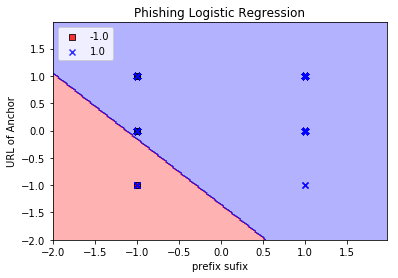

In [8]:
#Plot the test samples along with the decision boundary when trained with index 5 and index 13 parameters
plot_decision_regions(X_test[:,[5,13]], y_test, classifier=lr)

plt.xlabel('prefix sufix')
plt.ylabel('URL of Anchor')
plt.legend(loc='upper left')
plt.title('Phishing Logistic Regression')
plt.show()
#Square, or -1, indicates a phishing website; "x" or 1, indicates not a phishing website